In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
movies = pd.read_csv("ml-20m/movies.csv")

In [7]:
ratings = pd.read_csv("ml-20m/ratings.csv")[['movieId', 'rating']]

In [8]:
genome_scores = pd.read_csv("ml-20m/genome-scores.csv")

In [9]:
genome_tags = pd.read_csv("ml-20m/genome-tags.csv")

In [10]:
imdb_links = pd.read_csv("ml-20m/links.csv")

In [11]:
youtube_links = pd.read_csv("ml-20m/ml-youtube.csv")

In [12]:
links = pd.merge(imdb_links, youtube_links, on='movieId', how='left')[['movieId', 'imdbId', 'youtubeId', 'tmdbId']]

In [53]:
links.head()

,movieId,imdbId,youtubeId
0,1,114709,K26_sDKnvMU
1,2,113497,3LPANjHlPxo
2,3,113228,rEnOoWs3FuA
3,4,114885,j9xml1CxgXI
4,5,113041,ltwvKLnj1B4


In [14]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [15]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [17]:
movie_tags = pd.merge(genome_scores, genome_tags, on='tagId')[['movieId', 'tag', 'relevance']]

In [18]:
movie_tags.head()

,movieId,tag,relevance
0,1,007,0.02500
1,2,007,0.03975
2,3,007,0.04350
3,4,007,0.03725
4,5,007,0.04200


In [ ]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [ ]:
table = genome_scores[:].pivot_table('relevance', index='movieId', columns='tagId', aggfunc='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254B323C550>]],
      dtype=object)

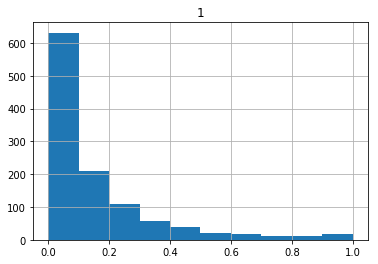

In [ ]:
table[:1].T.hist()

In [ ]:
movie_tags = genome_scores[genome_scores.relevance > 0.3][['movieId', 'tagId']]

In [ ]:
movie_tags = pd.merge(movie_tags, genome_tags, on='tagId', how='left')[['movieId', 'tagId']]

In [ ]:
movie_tags.head(5)

,movieId,tagId
0,1,11
1,1,19
2,1,21
3,1,29
4,1,30


In [ ]:
movie_tags['tagId'] = movie_tags.tagId.astype(str)

In [ ]:
def concatenate_tags(tags):
    tags_as_str = ' '.join(set(tags))
    return tags_as_str

In [ ]:
tags_per_movie = movie_tags.groupby('movieId')['tagId'].agg({
    'movie_tags': concatenate_tags
}).reset_index()

C:\Users\arjun\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [ ]:
tags_per_movie.head()

,movieId,movie_tags
0,1,446 94 971 338 669 627 1025 170 304 519 554 75...
1,2,568 971 304 752 530 367 388 193 468 396 244 29...
2,3,451 264 777 121 188 742 919 971 397 374 277 62...
3,4,201 497 777 121 188 169 742 913 179 328 556 82...
4,5,451 264 497 777 1040 121 188 450 742 919 971 1...


In [ ]:
avg_ratings = ratings.groupby('movieId')['rating'].agg({
    'rating_mean': 'mean',
    'rating_median': 'median',
    'num_ratings': 'size'
}).reset_index()

C:\Users\arjun\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [ ]:
avg_ratings.head()

,movieId,rating_mean,rating_median,num_ratings
0,1,3.921240,4.0,49695
1,2,3.211977,3.0,22243
2,3,3.151040,3.0,12735
3,4,2.861393,3.0,2756
4,5,3.064592,3.0,12161


In [ ]:
dataset = pd.merge(movies, avg_ratings, on='movieId', how='left')

In [ ]:
dataset = pd.merge(dataset, tags_per_movie, on='movieId', how='left')

In [ ]:
dataset.head()

,movieId,title,genres,rating_mean,rating_median,num_ratings,movie_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,4.0,49695.0,446 94 971 338 669 627 1025 170 304 519 554 75...
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,3.0,22243.0,568 971 304 752 530 367 388 193 468 396 244 29...
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,3.0,12735.0,451 264 777 121 188 742 919 971 397 374 277 62...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,3.0,2756.0,201 497 777 121 188 169 742 913 179 328 556 82...
4,5,Father of the Bride Part II (1995),Comedy,3.064592,3.0,12161.0,451 264 497 777 1040 121 188 450 742 919 971 1...


In [ ]:
dataset[dataset.movie_tags.isnull()].head()

,movieId,title,genres,rating_mean,rating_median,num_ratings,movie_tags
50,51,Guardian Angel (1994),Action|Drama|Thriller,2.555556,3.00,27.0,NaN
107,109,Headless Body in Topless Bar (1995),Comedy|Drama|Thriller,2.062500,1.75,16.0,NaN
113,115,Happiness Is in the Field (Bonheur est dans le...,Comedy,3.407895,4.00,38.0,NaN
122,124,"Star Maker, The (Uomo delle stelle, L') (1995)",Drama,3.498433,4.00,319.0,NaN
125,127,"Silences of the Palace, The (Saimt el Qusur) (...",Drama,3.256098,3.00,41.0,NaN


In [ ]:
dataset[dataset.rating_mean.isnull()].head()

,movieId,title,genres,rating_mean,rating_median,num_ratings,movie_tags
8555,26018,Chase a Crooked Shadow (1958),Crime|Film-Noir|Mystery|Thriller,NaN,NaN,NaN,NaN
8933,26580,"Park Is Mine, The (1986)",Action|Drama|Thriller,NaN,NaN,NaN,NaN
9249,27249,"Trumpet of the Swan, The (2001)",Animation|Drama|Musical,NaN,NaN,NaN,NaN
9315,27396,"Gentleman's Game, A (2002)",Drama,NaN,NaN,NaN,NaN
9770,31797,White Banners (1938),Drama,NaN,NaN,NaN,NaN


In [ ]:
dataset_with_tags = dataset[~dataset.movie_tags.isnull()].reset_index(drop=True)

# Count Vectorizer

In [ ]:
c_vectorizer = CountVectorizer()

In [ ]:
c_vectorized = c_vectorizer.fit_transform(dataset_with_tags.movie_tags)

In [ ]:
c_vectorized_m2m = pd.DataFrame(cosine_similarity(c_vectorized))

In [ ]:
c_vectorized_m2m.head(10)

,0,1,2,3,4,5,6,7,8,9,...,10371,10372,10373,10374,10375,10376,10377,10378,10379,10380
0,1.000000,0.524981,0.346501,0.277201,0.361600,0.440813,0.372558,0.379545,0.211700,0.383426,...,0.422813,0.370205,0.228502,0.328025,0.518853,0.138795,0.278589,0.276940,0.332991,0.381005
1,0.524981,1.000000,0.301726,0.264010,0.395118,0.251902,0.315404,0.456612,0.353730,0.457693,...,0.393106,0.397793,0.300919,0.387492,0.473573,0.264381,0.250233,0.226892,0.158573,0.354357
2,0.346501,0.301726,1.000000,0.421053,0.566282,0.253879,0.534456,0.407096,0.236940,0.380504,...,0.401394,0.285967,0.269953,0.297406,0.430997,0.172172,0.240824,0.364117,0.263435,0.304307
3,0.277201,0.264010,0.421053,1.000000,0.402358,0.224585,0.518737,0.424795,0.217195,0.244609,...,0.401394,0.319610,0.269953,0.270369,0.387897,0.196768,0.276948,0.253299,0.284510,0.275778
4,0.361600,0.395118,0.566282,0.402358,1.000000,0.157591,0.574150,0.345796,0.251577,0.311665,...,0.477334,0.414370,0.229304,0.287072,0.463725,0.125354,0.225018,0.282395,0.214817,0.306951
5,0.440813,0.251902,0.253879,0.224585,0.157591,1.000000,0.218727,0.236433,0.263752,0.355490,...,0.215961,0.234064,0.208681,0.346109,0.223893,0.219034,0.361903,0.229095,0.451599,0.370500
6,0.372558,0.315404,0.534456,0.518737,0.574150,0.218727,1.000000,0.348899,0.194606,0.292227,...,0.455556,0.301443,0.228440,0.218026,0.411919,0.176304,0.334457,0.212771,0.283246,0.306741
7,0.379545,0.456612,0.407096,0.424795,0.345796,0.236433,0.348899,1.000000,0.338648,0.383886,...,0.323970,0.322451,0.317744,0.395520,0.449323,0.322590,0.242965,0.271523,0.223253,0.287824
8,0.211700,0.353730,0.236940,0.217195,0.251577,0.263752,0.194606,0.338648,1.000000,0.443537,...,0.225877,0.265049,0.253185,0.410792,0.242536,0.442909,0.149071,0.160357,0.130454,0.181946
9,0.383426,0.457693,0.380504,0.244609,0.311665,0.355490,0.292227,0.383886,0.443537,1.000000,...,0.279827,0.299689,0.290423,0.450268,0.311592,0.285779,0.233177,0.245256,0.228543,0.309376


In [ ]:
c_vectorized_m2m_similarity = c_vectorized_m2m.stack().reset_index()

In [ ]:
c_vectorized_m2m_similarity.columns = ['first_movie', 'second_movie', 'similarity_score']

In [ ]:
c_vectorized_m2m_similarity.head(10)

# TfIdf Vectorization

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf_vectorized = tfidf.fit_transform(dataset_with_tags.movie_tags)

In [ ]:
tfidf_m2m = pd.DataFrame(cosine_similarity(tfidf_vectorized))

In [ ]:
tfidf_m2m.head(10)

In [ ]:
tfidf_m2m.ix[1].sort_values(ascending=False)[:20]

In [ ]:
m2m_similarity = tfidf_m2m.stack().reset_index()

In [ ]:
m2m_similarity.columns = ['first_movie', 'second_movie', 'similarity_score']

In [ ]:
m2m_similarity.head(5)

In [ ]:
m2m_similarity.tail(5)